C:\Users\riul0\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\riul0\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in true_divide
C:\Users\riul0\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: RuntimeWarning: invalid value encountered in true_divide


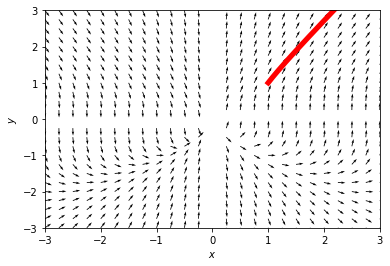

In [2]:
import matplotlib.pyplot as plt
from scipy import *
from scipy import integrate
from scipy.integrate import ode
import numpy as np
import math 

fig = plt.figure(num=1)
ax=fig.add_subplot(111)


## Vector field function
## x[0] = x // x[1] = y

def vf(t,x):
  dx=np.zeros(2)

  dx[0]=1
  dx[1]=(x[0]**2+x[1]**3)/((x[0])*(x[1]**2))  ## <- Here equation of dy/dx
  return dx

##Solution curves
t0=0; tEnd=10; dt=0.001;
r = ode(vf).set_integrator('vode', method='bdf',max_step=dt)

##Initial conditions for ecah line with its color
ic=[[1,1]]
color=['r']
listY = [] ## Lista vacia para añadir valores de Y del for..


for k in range(len(ic)):
    Y=[];T=[];S=[];
    r.set_initial_value(ic[k], t0).set_f_params()
    while r.successful() and r.t +dt < tEnd:
        r.integrate(r.t+dt)
        Y.append(r.y)

    S=np.array(np.real(Y))
    ax.plot(S[:,0],S[:,1], color = color[k], lw = 5.25)
    
    for elem in S[:,1]:
        listY.append(elem)
        
    

##Vector field with its linespace(interval)
X,Y = np.meshgrid( np.linspace(-3,3,25),np.linspace(-3,3,25) )

V = (X**2+Y**3)/((X)*(Y**2))   ## <- Here equation of dy/dx


##Normalize arrows not to have long arrows similar
U = 1
N = np.sqrt(U**2+V**2)  
U2, V2 = U/N, V/N
ax.quiver( X,Y,U2, V2)

##Analytical solution
#xs = S[:,0]
#y_exact = (S[:,0]**2/3)*((4*S[:,0]-3)**1/3)
#plt.plot(S[:,0],y_exact,'+',color='r')
##Limits of the graph
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.show()

In [6]:
import math
import numpy as np
levels_solution = []
x=1
y=1
C= (1/x)+(y**3/(3*x**3))
levels_solution.append(C)

levels=sorted(levels_solution)


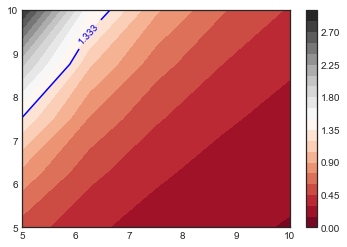

In [8]:
%matplotlib inline
plt.style.use('seaborn-white')

xs = np.linspace(5, 10, 5)
ys = np.linspace(5, 10, 5)

def fs(xs, ys):  ## y_exact equation without constant
    
    return (1/xs)+(ys**3/(3*xs**3))
X, Y = np.meshgrid(xs, ys)
Z = fs(X,Y)

contours = plt.contour(X, Y, Z,levels, colors='blue') ## Our solution
plt.clabel(contours, inline=1, fontsize=10)

plt.contourf(X, Y, Z, 20, cmap='RdGy') ## General contour curve
plt.colorbar()